# **Project 3 Report**

Antonio Lang

CS458

P3-1. Text Documents Classification on 20 newsgroup dataset

In [10]:
from sklearn.datasets import fetch_20newsgroups
newsdata_train = fetch_20newsgroups(subset='train',categories=['rec.autos','talk.religion.misc','comp.graphics','sci.space'])
newsdata_test = fetch_20newsgroups(subset='test',categories=['rec.autos','talk.religion.misc','comp.graphics','sci.space'])

In [16]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vector_train = vectorizer.fit_transform(newsdata_train.data)
vector_test = vectorizer.transform(newsdata_test.data)
x1 = vector_train
y1 = newsdata_train.target
x2 = vector_test
y2 = newsdata_test.target

models = []


SVM = LinearSVC(random_state=0, tol=1e-5)
models.append((SVM, 'SVM'))

NB = MultinomialNB(alpha=0.01)
models.append((NB, 'Naive Bayes'))

KNN = KNeighborsClassifier(n_neighbors=20)
models.append((KNN, 'K-Nearest Neighbors'))

RF = ensemble.RandomForestClassifier(n_estimators=150)
models.append((RF, 'Random Forest'))

ada = ensemble.AdaBoostClassifier(n_estimators=50)
models.append((ada, 'AdaBoost'))

for model in models:
    model[0].fit(x1,y1)
    score = model[0].score(x2,y2)
    print(f"{model[1]} score: {score}")

SVM score: 0.9202797202797203
Naive Bayes score: 0.9524475524475524
K-Nearest Neighbors score: 0.6
Random Forest score: 0.8867132867132868
AdaBoost score: 0.7594405594405594


P3-2. Recognizing Hand-Written Digits

In [40]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
x1,x2,y1,y2 = train_test_split(digits.data, digits.target, test_size=0.5)

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

NN = MLPClassifier(hidden_layer_sizes=(750,), activation='relu', alpha=0.00001,
                    learning_rate='constant', max_iter=750)
NN.fit(x1,y1)
predictions = NN.predict(x2)
print(f"Neural Network accuracy: {metrics.accuracy_score(y2, predictions)}")
confusion = confusion_matrix(y2, predictions)

Neural Network accuracy: 0.9744160177975528


P3-3. Nonlinear Support Vector Machine

In [44]:
import numpy as np
np.random.seed(0)
X = np.random.rand(300,2)*10-5
Y = np.logical_xor(X[:,0]>0,X[0:,1]>0)

In [ ]:
from sklearn.svm import NuSVC

nonlinearSVM = NuSVC()
nonlinearSVM.fit(X,Y)
predictions = nonlinearSVM.predict(X)

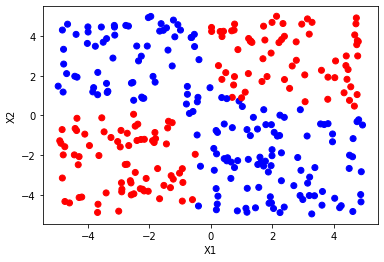

In [64]:
import matplotlib.pyplot as plt
from matplotlib import colors
# plot X,Y and decision boundaries

plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X[:,0], X[:,1], c=predictions, cmap=colors.ListedColormap(['red', 'blue']))